# Практическая работа №3: Регрессионный анализ.

Выполнил студент гр. 1375 Данько Никита. Вариант №10

## Цель работы

Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Постановка задачи

Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

Статистические данные: $(Y,z), Y-наблюдение,z-ковариата$

Линейная регрессионная модель: $\mathbb{E}_{\theta}(Y\mid z)=x(z)^\intercal\beta$

Линейная регрессионная модель: $\mathbb{E}_{\theta}(Y\mid z)=x(z)^\intercal\beta$

Статистическая модель: $\mathbb{E}_{\theta}(Y\mid z)=X^\intercal\beta,\space Var(Y|z) = \sigma^2E$

Альтернативная форма записи модели линейной регрессии: $Y = X^\intercal\beta + \varepsilon=\beta_0+\beta_1 x+\varepsilon, \space\mathbb{E}_{\theta}\varepsilon = 0,\space Var_{\theta}\varepsilon = \sigma^2E$

Метод наименьших квадратов: $RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$

Нормальные уравнения: $XX^\intercal\beta=XY$

Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^\intercal)^{-1}XY$

Оценивание параметра дисперсии, ДНО функции параметра

Оценка параметра $\sigma^2$: $S^2 =\frac{SS_e}{n-r} =\frac{RSS(\hat{\beta})}{n-r}$, $\space S^2$-несмещенная оценка дисперсии

Линейная функция параметра: $\psi(\beta) = C^\intercal\beta$

Будем говорить, что $\psi(\beta)$ допускает несмещенное оценивание, если $\exists L(Y) = B Y : \forall \beta : \mathbb{E}_\beta L(Y) = C^\intercal\beta$

Теорема Гаусса-Маркова: В модели линейной регрессии любая ДНО-функция параметра $\psi(\beta) = C^\intercal\beta$, $C = (c_1, \dots, c_m)^\intercal$ имеет НРМД - оценку $\hat{\psi}$. Эта оценка единственна в классе линейных несмещенных оценок и равна $\hat{\psi} = \sum_{i = 1}^{m}c_i\hat{\beta}_i$, где $\hat{\beta}$ - произвольное решение системы нормальных уравнений.

Доверительное оценивание

Доверительный интервал: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right]$, где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

Доверительный эллипсоид: $\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$,где $x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

Проверка гипотез

Основная гипотеза $H_0:\psi=0$

F-cтатистика: $\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$, где $SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$, где $\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы, $SS_e=RSS(\hat{\beta})$

## Выполнение работы

### 1. Построить графически результаты эксперимента. Сформулировать линейную регерессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from IPython.display import Markdown as md
import scipy.stats as sps
import scipy
import sympy
import random

In [3]:
X = np.array([2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0,
                0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2])
Y = np.array([8.03, 4.91, 1.08, 10.58, 3.25, 0.62, 9.49, 8.29, 11.45, 7.55, 9.87, 8.29, 3.76, 11.56, 7.84, 13.96, 7.3,
                4.66, 10.0, 4.33, 2.53, 7.43, 6.15, 3.39, 7.07, 3.62, 5.81, 7.42, 2.23, 5.05, 6.81, 12.86, 7.15, 10.54,
                9.94, 8.12, 4.52, 11.2, 7.23, 7.75, 9.45, 7.32, 5.58, 9.0, 7.02, 4.92, 9.29, 4.72, 13.77, 5.93])

In [7]:
df = pd.DataFrame({'X':X, 'Y':Y})
print(df)

    X      Y
0   2   8.03
1   2   4.91
2   2   1.08
3   1  10.58
4   0   3.25
5   0   0.62
6   1   9.49
7   1   8.29
8   1  11.45
9   1   7.55
10  1   9.87
11  0   8.29
12  1   3.76
13  0  11.56
14  0   7.84
15  2  13.96
16  2   7.30
17  2   4.66
18  2  10.00
19  0   4.33
20  1   2.53
21  2   7.43
22  0   6.15
23  1   3.39
24  1   7.07
25  2   3.62
26  0   5.81
27  2   7.42
28  1   2.23
29  0   5.05
30  0   6.81
31  2  12.86
32  2   7.15
33  2  10.54
34  0   9.94
35  0   8.12
36  1   4.52
37  1  11.20
38  1   7.23
39  2   7.75
40  0   9.45
41  1   7.32
42  0   5.58
43  0   9.00
44  0   7.02
45  0   4.92
46  2   9.29
47  0   4.72
48  1  13.77
49  2   5.93


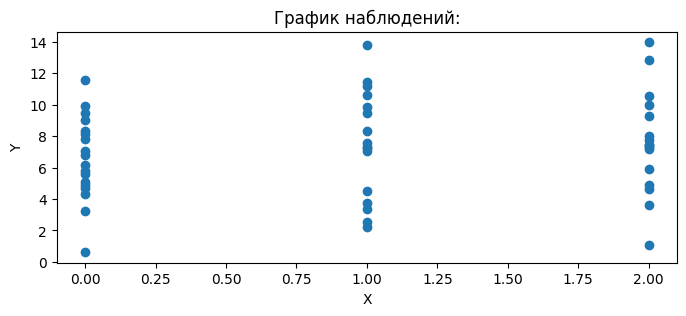

In [10]:
plt.figure(figsize = (8, 3))
plt.scatter(X,Y)
plt.title('График наблюдений:')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Линейная модель Y относительно X имеет вид:

$ Y = X^{T}\beta + ϵ$

Оценка вектора параметров $\beta$ по МНК:

$\beta = (XX^{T})^{-1}XY$

In [28]:
X_bias = np.insert(X.reshape(50, -1), 0, 1, axis = 1)

Оценки параметров $\beta_{0}$ и $\beta_{1}$:

In [26]:
XX = np.vstack([np.ones_like(X),X])
transposed_X = XX.T
result = np.dot(XX, transposed_X)
determinant = np.linalg.det(result)
print('Определитель X*X^T:',determinant, ' значит есть обратная')
y = Y.reshape(50, 1)
beta=np.dot(np.dot(np.linalg.inv(result),XX),y)
beta_0=beta[0]
beta_1=beta[1]
print('beta_0:',beta_0)
print('beta_1:',beta_1)

Определитель X*X^T: 1696.0000000000002  значит есть обратная
beta_0: [6.70632075]
beta_1: [0.52758255]


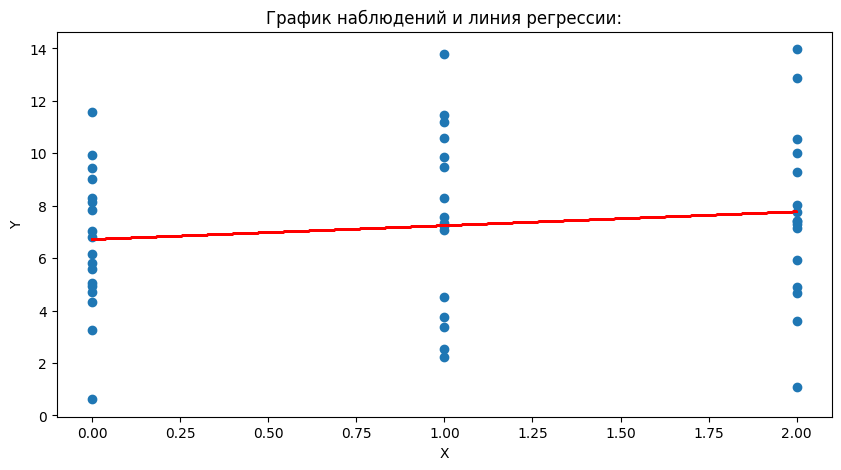

In [27]:
plt.figure(figsize = (10, 5))
plt.scatter(X,Y)
plt.plot(X, X * beta_1 + beta_0, c = 'r')
plt.title('График наблюдений и линия регрессии:')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

Линия регрессии имеет небольшой коэффициент наклона, и это говорит о том, что зависимость почти нет.

### 2. Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

In [17]:
np.linalg.matrix_rank(X_bias)#ранг матрицы X

2

In [18]:
beta = np.array([beta_0, beta_1])#вектор оценок параметров регрессии

In [33]:
n = len(Y)
s_2 = np.var(Y, ddof=1)
print("Несмещенная оценка дисперсии:", s_2)

Несмещенная оценка дисперсии: 9.681575673469387


[-6.68148585 -4.88148585 -3.08148585 -1.28148585  0.51851415  2.31851415
  4.11851415  5.91851415  7.71851415]


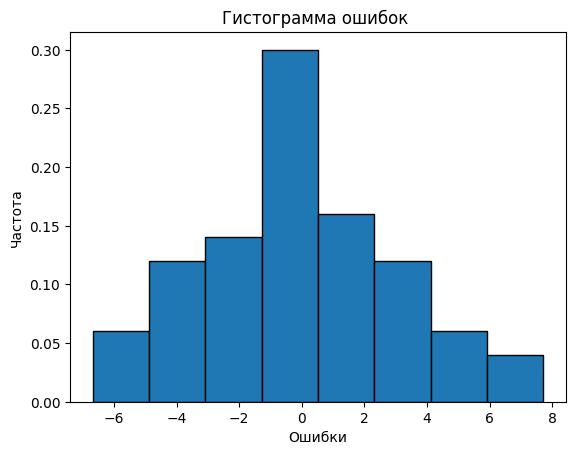

In [80]:
h = 1.8
bin=np.arange(np.min(mistakes), np.max(mistakes) + h, h)
print(bin)
weights = [1/(len(mistakes)) for _ in mistakes]
plt.hist(mistakes, bins=bin, edgecolor='black',weights =weights)
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок ')
plt.show()
mistakes.sort()


Проверка гипотезы нормальности ошибок:

$X_1, X_2, \dots, X_n \sim \mathbb{p_{\theta}(x)}$.

$H_0 : p \equiv N(0,s^{2})$

$H_A : \exists x : \mathbb{p_{\theta}(x)} \neq p_{N(0,s^{2})}(x)$


In [54]:
X = np.array(X)
Y = np.array(Y)

In [97]:
n = 50
alpha =  0.05
borders = np.array([-10,-4, -1, 1, 8])
print(borders)

[-10  -4  -1   1   8]


In [98]:
#абсолютные частоты
v, _ = np.histogram(mistakes, bins=borders)
print(v)
print(len(v))

[ 5 12 14 19]
4


In [118]:
#теоретические частоты
p = []
for i in range(1,len(borders)):
    p.append(sps.norm(0,np.sqrt(s_2)).cdf(borders[i]) - sps.norm(0,np.sqrt(s_2)).cdf(borders[i - 1]))
p = np.array(p)
print(len(p))
print(np.sum(p)) # Выводит значение близкое к 1

4
0.9942762067454407


In [103]:
intervals = ['[-$\inf$,-4)', '[-4,-1)', '[-1, 1)','[1,+$\inf$)']

Таблица абсолютных и относительных частот:

In [119]:
pd.DataFrame({'interval':intervals, 'absolute frequences':v, 'theoretical frequences':np.array(p) * n})

,interval,absolute frequences,theoretical frequences
0,"[-$\inf$,-4)",5,4.932315
1,"[-4,-1)",12,13.732891
2,"[-1, 1)",14,12.604106
3,"[1,+$\inf$)",19,18.444498


Рассчет статистики $\chi^2$:

In [120]:
np.sum(np.square(v - n * p)/(n * p))

0.3909188878790159

Рассчет критического значения на уровне значимости $\alpha$:

In [121]:
sps.chi2.ppf(1 - alpha, df = len(v)- 1)

7.814727903251179

$\chi^2 \approx 0.39$

$x_{\alpha} \approx 7.81$

$\chi^2 < x_{\alpha_2}$

Статистика $\chi^2$ в пределах критического значения уровня значимости $\alpha$. Гипотеза $H_{0}$ принимается.

Рассчет статистики Колмогорова:

In [123]:
D, _  = sps.kstest(mistakes, 'norm', args = [0, np.sqrt(s_2)])
eta = np.sqrt(n) * D
print(eta)

0.562442860407597


Рассчет критического значения на уровне значимости 1 - $\alpha$

In [125]:
sps.kstwobign.ppf(1 - alpha)

1.3580986393225505

$\hat D_n < x_\alpha$

Статистика Колмогорова оказалась в пределах критического значения уровня значимости $\alpha$. Гипотеза $H_{0}$ принимается.

### 3. В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для $\left( \beta_0,\beta_1 \right)$ (вычислить его полуоси).

#### Доверительный интервал для $\beta_{0}$:



МНК-оценка: $ψ = C^{T}\hat{\beta}$

In [178]:
C = np.array([1, 0])
psi_est = C.T.dot(beta)
X = np.array(X)
X = X.reshape(50, 1)
X_matrix = np.concatenate([np.ones(n).reshape(n,1), X], axis = 1)

Элемент диcперсии оценки: $b_{\psi} = C^{T}(X^{T}X)C$

In [179]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.04716981132075471

$x_{\alpha}: S_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [180]:
x_alpha = sps.t(df = n - 2).ppf(1- alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [181]:
left = psi_est - x_alpha * np.sqrt(s_2) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(s_2) * np.sqrt(b)

print(f' Доверительный интервал для b_0:[{left}, {right}]')

 Доверительный интервал для b_0:[[5.34757476], [8.06506675]]


#### Доверительный интервал для $\beta_{1}$:

In [171]:
C = np.array([0, 1])

In [172]:
psi_est = C.T.dot(beta)

Элемент диcперсии оценки: $b_{\psi} = C^{T}(X^{T}X)C$

In [174]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.029481132075471695

$x_{\alpha}: S_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [175]:
x_alpha = sps.t(df = n - 2).ppf(1 - alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [176]:
left = psi_est - x_alpha * np.sqrt(s_2) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(s_2) * np.sqrt(b)

print(f' Доверительный интервал для b_1:[{left}, {right}]')

 Доверительный интервал для b_1:[[-0.54660048], [1.60176557]]


#### Нахождения уравнения доверительного эллипса:

In [164]:
C = np.array([[1, 0],[0, 1]])
psi_est = C.T.dot(beta)
B = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)

In [144]:
x_symbol = sympy.Symbol('x')
y_symbol = sympy.Symbol('y')
x_vec = np.matrix([[x_symbol], [y_symbol]])
expr = (x_vec - psi_est).T * inv(B) * (x_vec - psi_est)
print(f"Неравенство эллипса: {expr[0,0].as_poly().as_expr()} <= {2 * s_2 * sps.f(2, n - 2).ppf(1 - alpha)}")

Неравенство эллипса: 50.0*x**2 + 96.0*x*y - 721.28*x + 80.0*y**2 - 728.22*y + 2610.66559823113 <= 61.782536312398285


Рассчет полуосей:

In [162]:
import numpy as np

# Матрица коэффициентов эллипса
A = np.array([[50.0, 48.0], [48.0, 80.0]])

# Нахождение собственных значений и собственных векторов
eigenvalues, eigenvectors = np.linalg.eig(A)

# Полуоси эллипса
semi_axis_1 = np.sqrt(1 / eigenvalues[0])
semi_axis_2 = np.sqrt(1 / eigenvalues[1])

print("Полуось 1:", semi_axis_1)
print("Полуось 2:", semi_axis_2)

Полуось 1: 0.26072418630107724
Полуось 2: 0.09313346377037393


Первая полуось $≈$ 0.26072418630107724

Вторая полуось $≈$ 0.09313346377037393

### 4. Сформулировать гипотезу независимости Y от X. Провести проверку значимости.

$H_{0}: \beta_{1} = 0$

$H_{A}: \beta_{1} \not= 0$


Рассчет F - статистики:

In [203]:
from scipy.stats import f

p = 2  
SSE = np.sum((Y - (beta_0 + beta_1 * X)) ** 2)
SSR = np.sum((beta_0 + beta_1 * X - np.mean(Y)) ** 2)
SST = SSE + SSR
MSE = SSE / (n - p)  
MSR = SSR / p  
F = MSR / MSE
alpha = 0.05
F_critical = f.ppf(1 - alpha, p, n - p) 
print("F-критерий",F)
print("Критическое значение F = ",F_critical)
if F > F_critical:
    print("Отвергаем нулевую гипотезу. Существует значимая зависимость между Y и X.")
else:
    print("Принимаем нулевую гипотезу. Нет существенной зависимости между Y и X.")

F-критерий 0.00936650126229589
Критическое значение F =  3.190727335928499
Принимаем нулевую гипотезу. Нет существенной зависимости между Y и X.


### 5. Сформулировать модель, включающую дополнительный член с $\chi^2$. Построить МНК оценки параметров $\beta_0,\beta_1,\beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

Линейная регрессионная модель переменной Y по переменной X формулируется следующим образом:

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$

Оценки параметров:
β0 =  6.58111111111111
β1 =  1.3492708333333303
β2 =  -0.4147569444444419


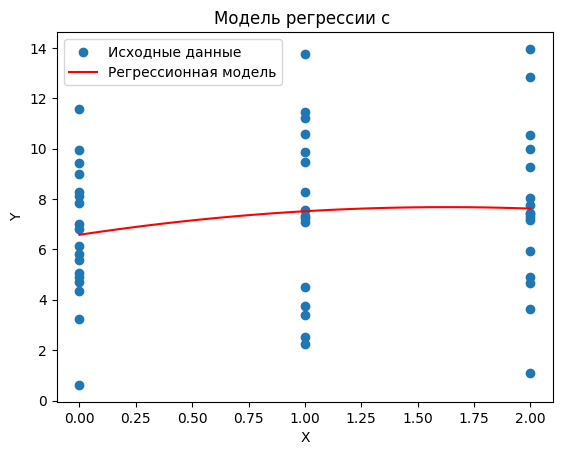

In [207]:
X_2 = X ** 2
X_stacked = np.column_stack((np.ones_like(X), X, X_2))


beta = np.linalg.lstsq(X_stacked, Y, rcond=None)[0]

beta_0 = beta[0]
beta_1 = beta[1]
beta_2 = beta[2]

print("Оценки параметров:")
print("β0 = ",beta_0)
print("β1 = ",beta_1)
print("β2 = ",beta_2)

x = np.linspace(min(X), max(X), 100)
y = beta_0 + beta_1 * x + beta_2 * x ** 2

plt.scatter(X, Y, label='Исходные данные')
plt.plot(x, y, 'r', label='Регрессионная модель')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Модель регрессии с ')
plt.legend()
plt.show()

### 6. Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [215]:
n = len(Y)
s_2 = np.var(Y, ddof=1)
print("Несмещенная оценка дисперсии:", s_2)

Несмещенная оценка дисперсии: 9.681575673469387


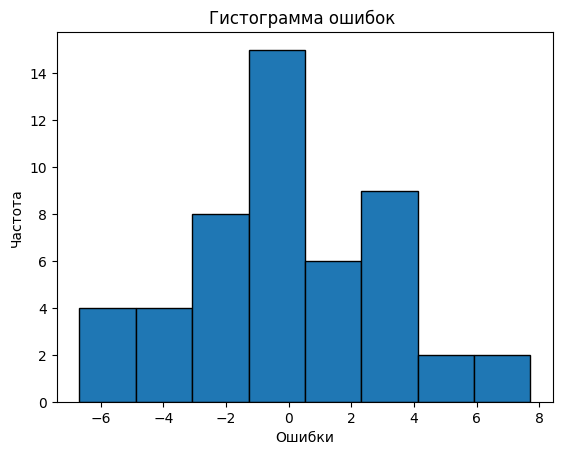

In [218]:
h = 1.8
mistakes = Y - X_matrix.dot(beta)
bins = np.arange(mistakes.min(), mistakes.max() + h, h)
plt.hist(mistakes, bins=bin, edgecolor='black')
plt.xlabel('Ошибки')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок ')
plt.show()
mistakes.sort()


$X_1, X_2, \dots, X_n \sim \mathbb{p_{\theta}(x)}$.

$H_0 : p \equiv N(\bar{X},s^{2})$

$H_A : \exists x : \mathbb{p_{\theta}(x)} \neq p_{N(\bar{X},s^{2})}(x)$

 Оценка параметра - ОМП: $\hat{\theta} = (\bar{X},s^{2})$

In [223]:
n = 50
alpha =  0.05
borders = [-8,-2,0,3,8]
mistakes.sort()

In [224]:
borders

[-8, -2, 0, 3, 8]

In [225]:
mu = np.mean(mistakes)
s_2 = (1/n)*(np.sum((mistakes - mu)**2))
mu, s_2

(2.4371615836571438e-14, 9.261725305555554)

In [227]:
#абсолютные частоты
v, _ = np.histogram(mistakes, bins=borders)
print(v)


[12 14 16  8]


In [228]:
#теоретические частоты
p = []
for i in range(1,len(borders)):
    p.append(sps.norm(0,np.sqrt(s_2)).cdf(borders[i]) - sps.norm(0,np.sqrt(s_2)).cdf(borders[i - 1]))
p = np.array(p)
print(len(p))
print(np.sum(p))

4
0.9914292659528734


In [229]:
intervals = ['[-8,-2)', '[-2,0)', '[0, 3)','[3,+inf)']

In [230]:
pd.DataFrame({'interval':intervals, 'absolute frequences':v, 'theoretical frequences':p * n})

,interval,absolute frequences,theoretical frequences
0,"[-8,-2)",12,12.562368
1,"[-2,0)",14,12.223363
2,"[0, 3)",16,16.893842
3,"[3,+inf)",8,7.891889


Рассчет статистики $\chi^{2}$:

In [231]:
np.sum(np.square(v - n * p)/(n * p))

0.3321785373699884

Рассчет критического значения на уровне значимости $\alpha$

In [232]:
sps.chi2.ppf(1 - alpha, df = len(v)- 1)

7.814727903251179

$\chi^2 \approx 0.3321785373699884$

$x_{\alpha} \approx 7.814727903251179$

$\chi^2 < x_{\alpha_2}$

Статистика $\chi^{2}$ в пределах критического значения уровня значимости $\alpha$. Гипотеза $H_{0}$ принимается.

Рассчет статистики колмогорова:

In [233]:
D, _  = sps.kstest(mistakes, 'norm', args = [0, np.sqrt(s_2)])
eta = np.sqrt(n) * D
eta

0.5554433768512925

Рассчет критического значения на уровне значимости 1 - $\alpha$

In [234]:
sps.kstwobign.ppf(1 - alpha)

1.3580986393225505

$\hat D_n < x_\alpha$

Статистика Колмогорова оказалась в пределах критического значения уровня значимости $\alpha$. Гипотеза $H_{0}$ принимается.

### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$. 

#### Доверительный интервал для $\beta_{0}$:



In [ ]:
beta = [beta_0, beta_1, beta_2]
C = np.array([1,0, 0])
psi_est = C.T.dot(beta)

Элемент диcперсии оценки: $b_{\psi} = C^{T}(X^{T}X)C$

In [237]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.055555555555555525

$x_{\alpha}: S_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [238]:
x_alpha = sps.t(df = n - 2).ppf(1 - alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [239]:
left = psi_est - x_alpha * np.sqrt(s_2) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(s_2) * np.sqrt(b)

print(f' Доверительный интервал:[{left}, {right}]')

 Доверительный интервал:[5.1388533630788595, 8.023368859143305]


#### Доверительный интервал для $\beta_{1}$:

In [240]:
C = np.array([0, 1, 0])
psi_est = C.T.dot(beta)

In [241]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.3906249999999994

In [242]:
x_alpha = sps.t(df = n - 2).ppf(1 - alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [243]:
left = psi_est - x_alpha * np.sqrt(s_2) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(s_2) * np.sqrt(b)

print(f' Доверительный интервал:[{left}, {right}]')

 Доверительный интервал:[-2.4750925436132585, 5.173634210279916]


#### Доверительный интервал для $\beta_{2}$:

In [244]:
C = np.array([0, 0, 1])
psi_est = C.T.dot(beta)

Элемент диcперсии оценки: $b_{\psi} = C^{T}(X^{T}X)C$

In [245]:
b = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
b

0.09201388888888874

$x_{\alpha}: S_{n - r}(x_{\alpha}) = 1 - \frac{\alpha}{2}$

In [246]:
x_alpha = sps.t(df = n - 2).ppf(1 - alpha/2)
x_alpha

2.0106347546964454

Доверительный интервал уровня доверия $1 - \alpha$:

In [247]:
left = psi_est - x_alpha * np.sqrt(s_2) * np.sqrt(b)
right = psi_est + x_alpha * np.sqrt(s_2) * np.sqrt(b)

print(f' Доверительный интервал:[{left}, {right}]')

 Доверительный интервал:[-2.2708759871585116, 1.4413620982696336]


#### Уравнение доверительного эллипсоида:

In [249]:
C = np.diag(np.full(3,1))
C

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [250]:
psi_est = C.T.dot(beta)
B = C.T.dot(np.linalg.inv(X_matrix.T.dot(X_matrix))).dot(C)
x_symbol = sympy.Symbol('x')
y_symbol = sympy.Symbol('y')
z_symbol = sympy.Symbol('z')

x_vec = np.matrix([[x_symbol], [y_symbol], [z_symbol]])
expr = (x_vec - psi_est).T * inv(B) * (x_vec - psi_est)
print(f"Неравенство эллипса: {expr[0,0].as_poly().as_expr()} <= {2 * s_2 * sps.f(2, n - 2).ppf(1 - alpha)}")

Неравенство эллипса: 50.0000000000002*x**2 + 96.0000000000005*x*y + 160.000000000001*x*z - 2342.87555555556*x + 80.0000000000003*y**2 + 288.000000000001*y*z - 3580.12444444444*y + 272.000000000001*z**2 - 6528.46222222222*z + 40972.2281901232 <= 59.103280220593675


Рассчет полуосей:

In [251]:
cov = inv(B)
eigenvalues, _ = np.linalg.eig(cov)
np.sqrt(1/eigenvalues * (alpha * 2 * s_2))

array([0.04964881, 0.19543598, 0.6766097 ])

Первая полуось $≈$ 0.04964881

Вторая полуось $≈$ 0.19543598

Третья полуось $≈$ 0.6766097

### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от X и проверить ее значимость на уровне $\alpha$

$H_{0}: \bar\beta = (0, \hat\beta_{1}, 0)^{T}$

$H_{A}: \beta_{1} \not= (0, \hat\beta_{1}, 0)^{T}$

Рассчет F - статистики:

In [8]:
import numpy as np
from scipy.stats import f
beta_0 = 6.58
beta_1 = 1.35
beta_2 = -0.41
X = np.array([2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0,
                0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2])
Y = np.array([8.03, 4.91, 1.08, 10.58, 3.25, 0.62, 9.49, 8.29, 11.45, 7.55, 9.87, 8.29, 3.76, 11.56, 7.84, 13.96, 7.3,
                4.66, 10.0, 4.33, 2.53, 7.43, 6.15, 3.39, 7.07, 3.62, 5.81, 7.42, 2.23, 5.05, 6.81, 12.86, 7.15, 10.54,
                9.94, 8.12, 4.52, 11.2, 7.23, 7.75, 9.45, 7.32, 5.58, 9.0, 7.02, 4.92, 9.29, 4.72, 13.77, 5.93])
SSR = np.sum((beta_0 + beta_1 * X + beta_2 * X ** 2 - np.mean(Y)) ** 2)
n=50
SSE = np.sum((Y - (beta_0 + beta_1 * X + beta_2 * X ** 2)) ** 2)
p = 3
# Выводим общую сумму квадратов отклонений
SST = SSE + SSR
MSE = SSE / (n - p)  # среднеквадратичное отклонение остатков
MSR = SSR / p  # среднеквадратичное отклонение объясненных отклонений
F = MSR / MSE  # вычисляем значение F-критерия

alpha = 0.05

F_critical = f.ppf(1 - alpha, p, n - p)  # критическое значение F-критерия

print("F =",F)
print("Критическое значение =", F_critical)
# Проверка значимости гипотезы
if F_critical < 0.05:
    print("Гипотеза линейной регрессионной зависимости переменной Y от переменной X значима на уровне 0.05.")
else:
    print("Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне 0.05.")

F = 0.3937126354426744
Критическое значение = 2.80235517609617
Гипотеза линейной регрессионной зависимости переменной Y от переменной X не значима на уровне 0.05.


$F < x_\alpha $ - гипотеза отвергается

## Выводы

В процессе выполнения практической работы был изучен регрессионный анализ, который представляет собой важный инструмент как в области статистики, так и в машинном обучении. В рамках работы были выполнены несколько этапов: построение регрессионной модели, оценка параметров модели и их значимость, проверка гипотезы о независимости и линейной регрессионной зависимости, а также оценка нормальности ошибок и создание доверительных интервалов и эллипсов.Для решения поставленных задач использовались специализированные библиотеки и функции языка программирования Python. Например, одной из таких библиотек является SciPy, которая предоставляет классы и функции для выполнения различных статистических вычислений. Для оценки расстояния полученной оценки до класса нормальных распределений был использован критерий Колмогорова, доступный в библиотеке SciPy, с помощью функций kstest или scipy.stats.